# Exploring Predictive Models for Diabetes Diagnosis

## Business Understanding

Diabetes is a growing public health challenge, affecting millions worldwide and posing significant healthcare costs and risks. Identifying individuals at risk of diabetes or prediabetes early can enable preventive measures and improve healthcare outcomes. This project aims to leverage machine learning techniques to predict diabetes status using health indicators from survey data, providing insights into the most influential factors and enabling informed decision-making. By building and evaluating predictive models, the project seeks to support healthcare providers in identifying high-risk individuals efficiently.

### Problem Statement

Diabetes has been recognized as a medical condition for thousands of years. Around 1500 BCE, Ancient Egyptians described a condition involving excessive urination and extreme thirst, though they did not understand its underlying causes. The term "diabetes" itself, derived from the Greek word "siphon," meaning "to pass through," was coined by the Greek physician Aretaeus in the 2nd century. The condition was further studied in the 19th century when researchers discovered that the pancreas was key in regulating blood sugar. In the 1920s, the groundbreaking discovery of insulin by Frederick Banting and Charles Best revolutionized diabetes management, offering the first effective treatment for the disease and marking a significant milestone in medical history.

### Objectives

1. To develop machine learning models that accurately predict diabetes or prediabetes based on health indicators.
2. To identify the most significant factors contributing to diabetes risk.
3. To evaluate and compare the performance of Logistic Regression, Decision Tree, Random Forest, and XGBoost models.
4. To address the class imbalance in the dataset and its impact on predictive accuracy.
5. To create a predictive tool that can be integrated into healthcare workflows for early detection and intervention.

### Research Questions

1. What are the most significant health indicators associated with diabetes risk?
2. How accurately can machine learning models classify individuals with and without diabetes?
3. Which machine learning model performs best in terms of predictive accuracy and reliability?
4. How does class imbalance in the dataset affect model performance, and what strategies can mitigate this?
5. How can the predictive model be integrated into real-world healthcare applications for early diabetes detection?

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

import optuna

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix, auc
from mlxtend.plotting import plot_confusion_matrix

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Staging

In [2]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('diabetes _ binary _ health _ indicators _ BRFSS2015.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [4]:
df.tail()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  
253675       5.0       0.0  1.0   5.0        6.0     7.0  
253676       0.0       1.0  0.0  11.0        2.0     4.0  
253677       0.0       0.0  0.0   2.0        5.0     2.0  
253678       0.0       0.0  1.0   7.0        5.0     1.0  
253679       0.0       0.0  0.0   9.0        6.0     2.0

In [5]:
df = df.astype(int)

Since all the values float to the point of zero and most variables are categories, I have converted them to integers.

In [6]:
df.shape

(253680, 22)

## Data Understanding

The dataset used in this project, sourced from the CDC's BRFSS2015, consists of 253,680 survey responses with 21 health indicators and one target variable, Diabetes_binary. This binary target variable classifies individuals as either non-diabetic (0) or diabetic/prediabetic (1). The features include demographic, behavioral, and health-related factors such as BMI, smoking status, blood pressure, physical activity, and cholesterol check status. While the dataset is clean with no missing values, it is imbalanced, with fewer diabetic/prediabetic cases compared to non-diabetic cases. Understanding the distribution and relationships among these features is essential for identifying patterns, addressing class imbalance, and optimizing the predictive models.

### Profile Report

From the profile report I have been able to get a snapshot of how my data generally looks like.

1. The data has 253,680 observations
2. The total number of columns is 22 with 16 categorical columns and 6 continuous columns.
3. The data has no missing values.
4. There are duplicated rows (4.5%) of the data
5. There is a high data imbalance across most of the variables such as CholCheck, Stroke, HeartDiseaseorAttack, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, MentHlth, and PhysHlth.
6. My outcome variable diabetes is highly imbalanced.

In [7]:
Profile = ProfileReport(df, title = 'Diabetes Profile', explorative = True)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preparation

In the data preparation phase, I first ensured that the dataset was free from missing values. However, I identified and removed 24,206 duplicate rows to maintain the integrity of the data. Initially, I applied SMOTE for oversampling to address the class imbalance, but this resulted in underfitting in the models. Afterward, I shifted to using the NearMiss undersampling technique, which improved the model performance. Since many of the continuous variables, such as BMI and age, were not normally distributed, I scaled these features using the StandardScaler to ensure they were on the same scale and ready for modeling. This data cleaning and preprocessing ensured that the dataset was well-prepared, leading to better performance from the machine learning models.

### Data Cleaning

In this section, I did data cleaning.

1. There were no missing values in the data.
2. I dropped 24,206 rows that were duplicates.

In [8]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [10]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

In [11]:
df.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

In [12]:
df.head()

Diabetes  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0         0       1         1          1   40       1       0   
1         0       0         0          0   25       1       0   
2         0       1         1          1   28       0       0   
3         0       1         0          1   27       0       0   
4         0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                     0             0       0        1                  0   
1                     0             1       0        0                  0   
2                     0             0       1        0                  0   
3                     0             1       1        1                  0   
4                     0             1       1        1                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1            0        5        18        15         1    0   
1              0            1        3         0         0         0    0   
2              1            1        5        30        30         1    0   
3              1            0        2         0         0         0    0   
4              1            0        2         3         0         0    0   

   Age  Education  Income  
0    9          4       3  
1    7          6       1  
2    9          4       8  
3   11          3       6  
4   11          5       4

In [13]:
df.isnull().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
df.duplicated().sum()

24206

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(229474, 22)

## Explanatory Data Analysis

In this section I did explanatory data analysis. I deduced the following.

1. Most of the columns are categories.
2. There is low correlation between the independent variables. Thus, each variable is unique in providing information to predict the target variable.
3. There is class imbalance in the target variable.

In [18]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes                               2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [19]:
df.describe()

Diabetes         HighBP       HighChol      CholCheck  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.152945       0.454343       0.441640       0.959481   
std         0.359936       0.497912       0.496584       0.197173   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count  229474.000000  229474.00000  229474.000000         229474.000000   
mean       28.687507       0.46580       0.044816              0.103336   
std         6.789204       0.49883       0.206899              0.304398   
min        12.000000       0.00000       0.000000              0.000000   
25%        24.000000       0.00000       0.000000              0.000000   
50%        27.000000       0.00000       0.000000              0.000000   
75%        32.000000       1.00000       0.000000              0.000000   
max        98.000000       1.00000       1.000000              1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  229474.000000  229474.000000  229474.000000      229474.000000   
mean        0.733042       0.612675       0.794587           0.060791   
std         0.442371       0.487140       0.404004           0.238947   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       1.000000           0.000000   
50%         1.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

       AnyHealthcare    NoDocbcCost        GenHlth       MentHlth  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.946011       0.092921       2.601820       3.509866   
std         0.225996       0.290323       1.064962       7.717643   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       3.000000       0.000000   
75%         1.000000       0.000000       3.000000       2.000000   
max         1.000000       1.000000       5.000000      30.000000   

            PhysHlth       DiffWalk            Sex            Age  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        4.681219       0.185751       0.439087       8.085068   
std         9.050877       0.388906       0.496277       3.094451   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       6.000000   
50%         0.000000       0.000000       0.000000       8.000000   
75%         4.000000       0.000000       1.000000      10.000000   
max        30.000000       1.000000       1.000000      13.000000   

           Education         Income  
count  229474.000000  229474.000000  
mean        4.979741       5.888615  
std         0.992989       2.092888  
min         1.000000       1.000000  
25%         4.000000       4.000000  
50%         5.000000       6.000000  
75%         6.000000       8.000000  
max         6.000000       8.000000

In [20]:
df_corr = df.select_dtypes(include = 'number')
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

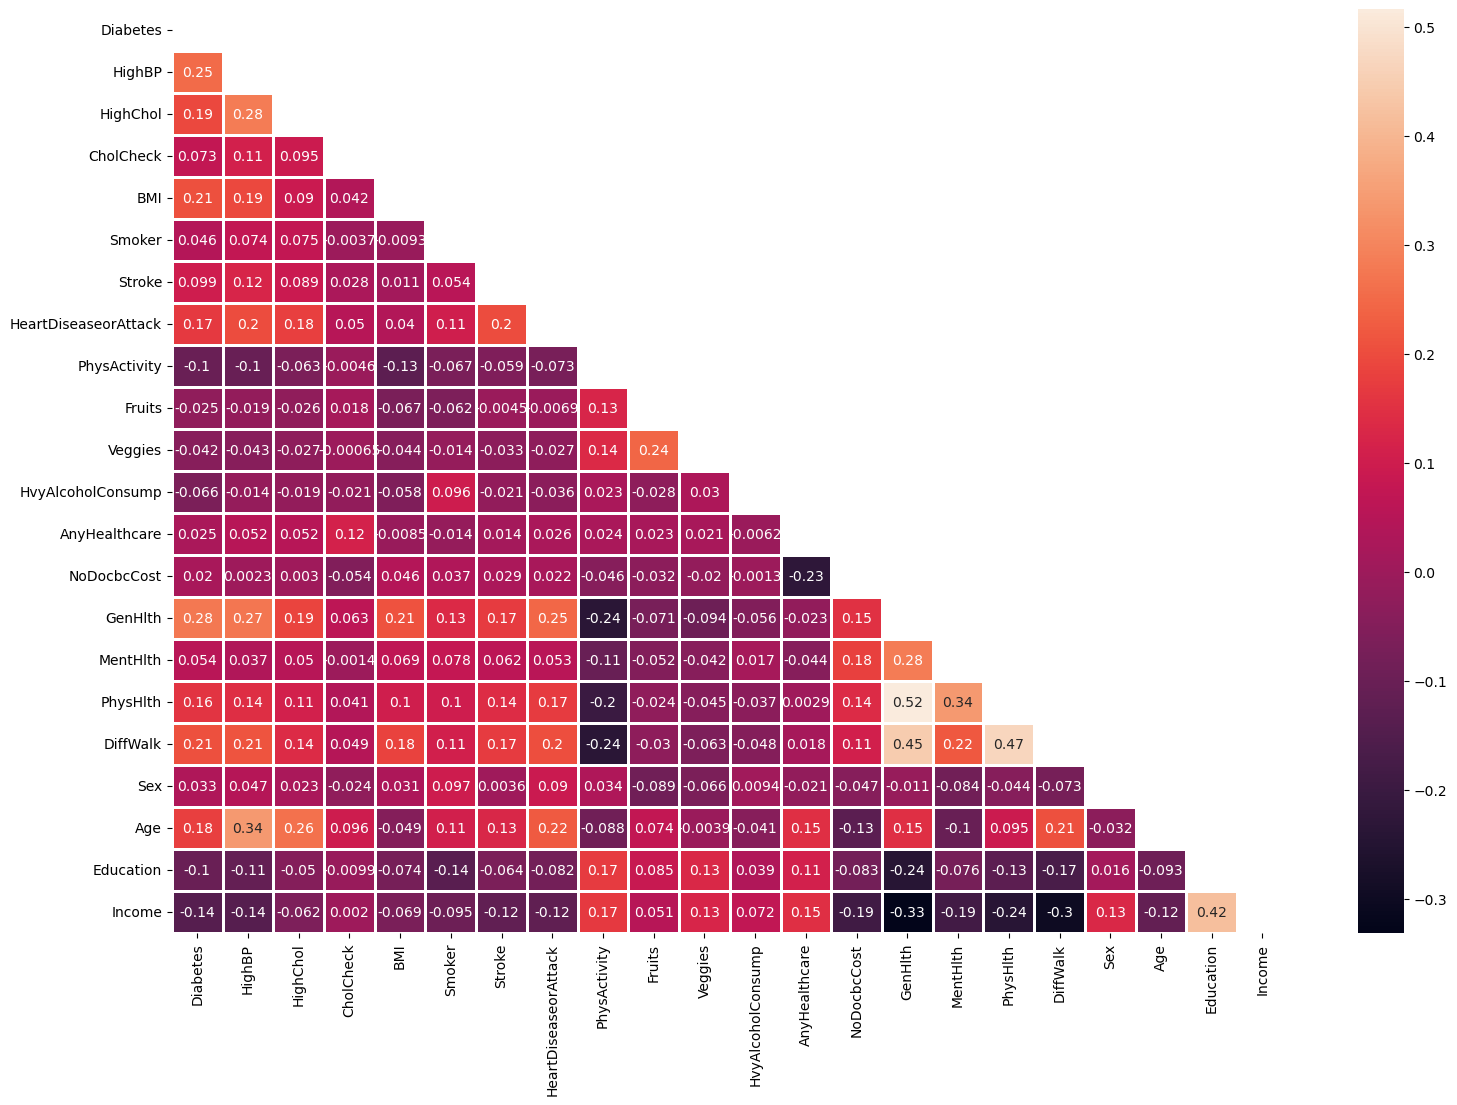

In [21]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the heat map above, there is a low and moderate correlation between the independent variables, indicating minimal multicollinearity, which is beneficial for building reliable predictive models for diabetes. This suggests that each variable contributes unique information to the prediction process, improving model interpretability and accuracy.

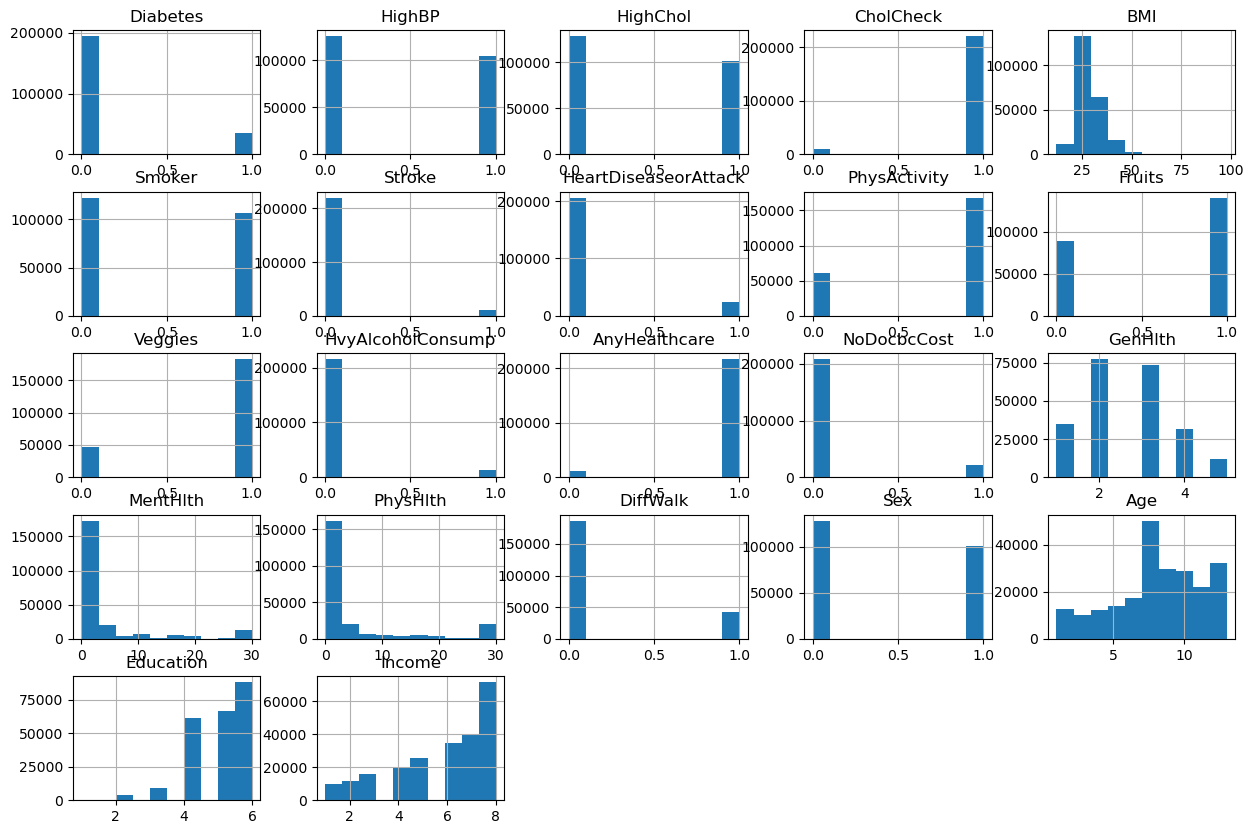

In [22]:
# Plot the histogram
df.hist(figsize=(15, 10))
plt.show()

From the histogram, the continuous variables are not normally distributed; thus, I will normalize the variables.

Text(0.5, 1.0, 'Distribution of the BMI')

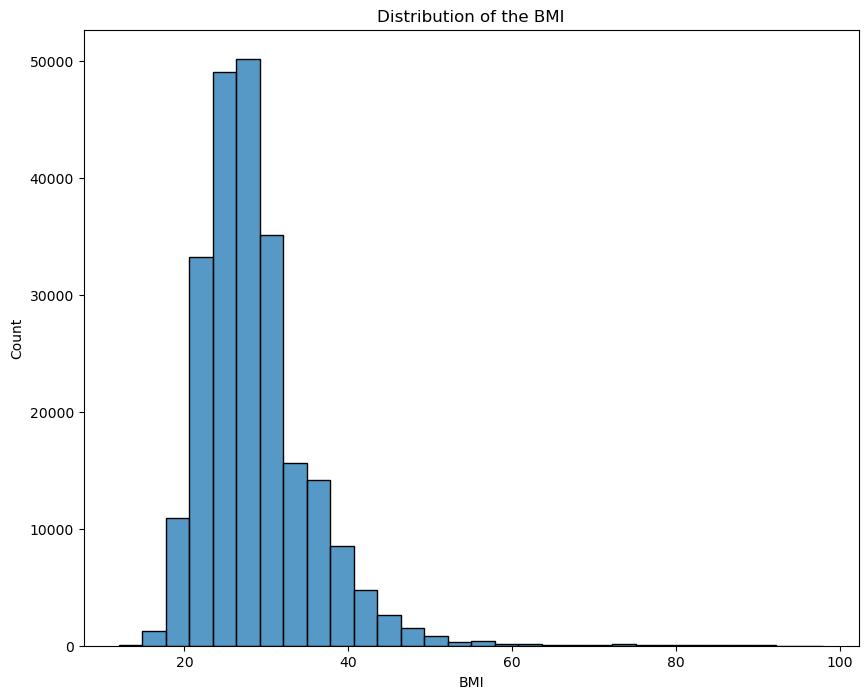

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='BMI',bins=30)
plt.xlabel('BMI')
plt.title('Distribution of the BMI')

The histogram above shows that the population's BMI is skewed to the right. With a majority of the people having a BMI of between 20 and 40.

In [24]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x='Diabetes', data=df)
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Text (count)
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
        ha='center', va='center',  # Align center
        fontsize=10, color='black', xytext=(0, 5),  # Style
        textcoords='offset points'
    )

plt.show()

There is a data imbalance in the outcome variable with the majority of the people not having diabetes. Thus, data balancing will be necessary when building my model.

In [25]:
pd.crosstab(df['Education'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HighBP vs. Diabetes')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

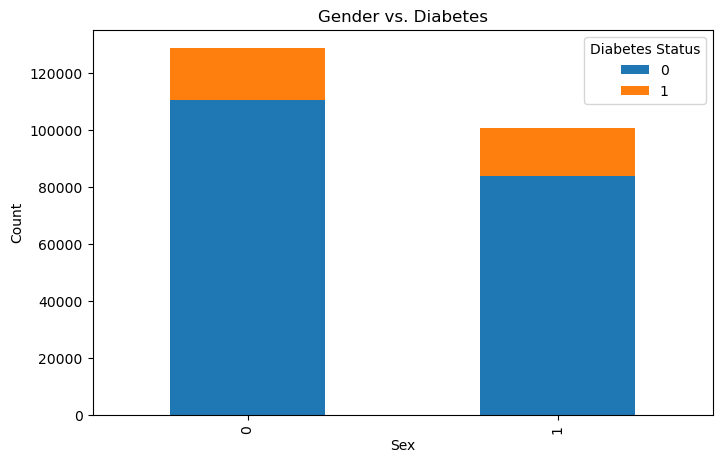

In [26]:
pd.crosstab(df['Sex'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Gender vs. Diabetes')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

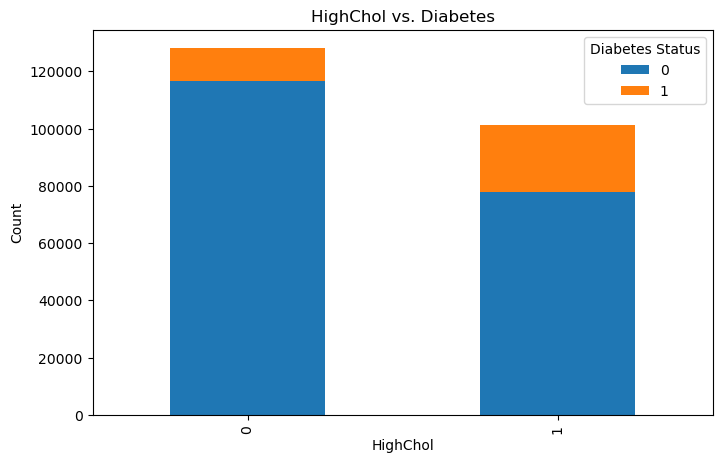

In [27]:
pd.crosstab(df['HighChol'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HighChol vs. Diabetes')
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

Based on the barplot people with High cholestrol are at higher risk of developing Diabetes.

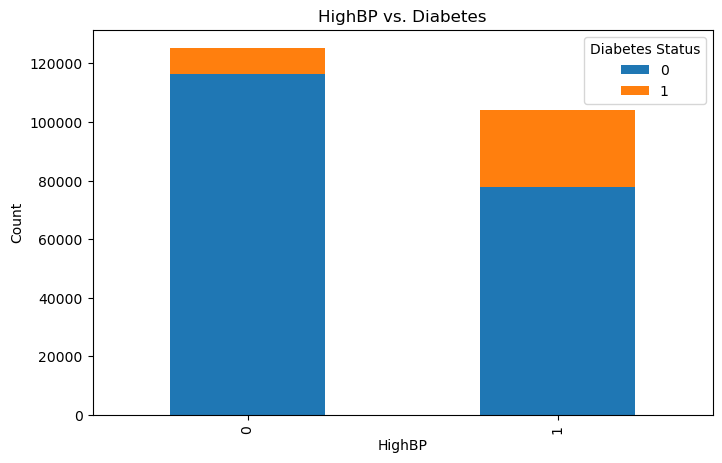

In [28]:
pd.crosstab(df['HighBP'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HighBP vs. Diabetes')
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

Based on the barplot people with High blood pressure are at higher risk of developing Diabetes.

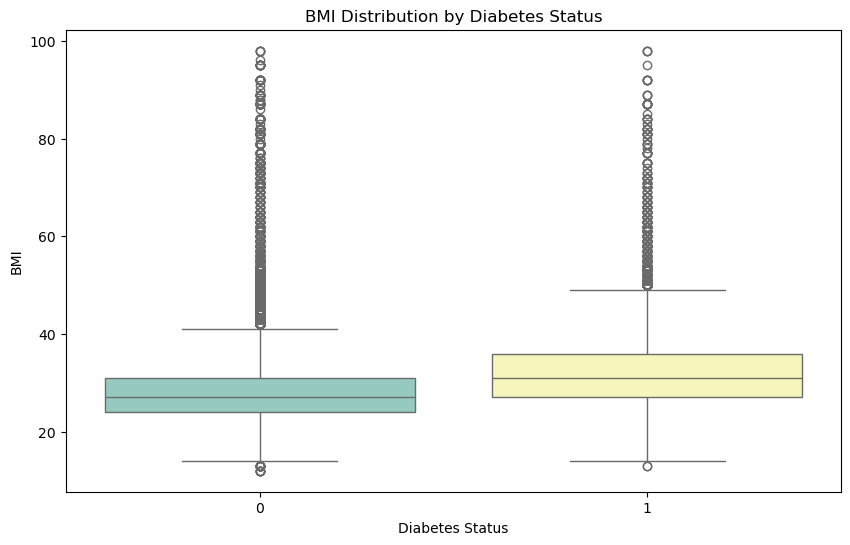

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes', y='BMI', data=df, palette='Set3')
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

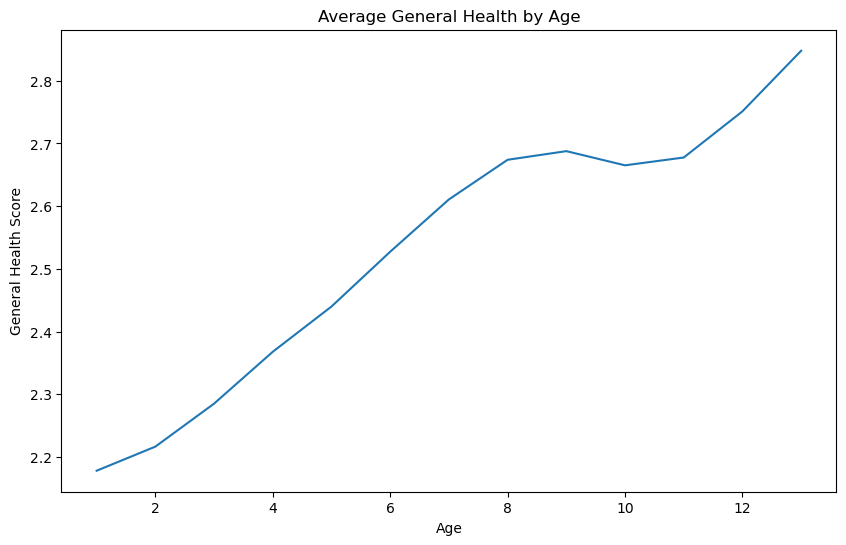

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='GenHlth', data=df, ci=None)
plt.title('Average General Health by Age')
plt.xlabel('Age')
plt.ylabel('General Health Score')
plt.show()

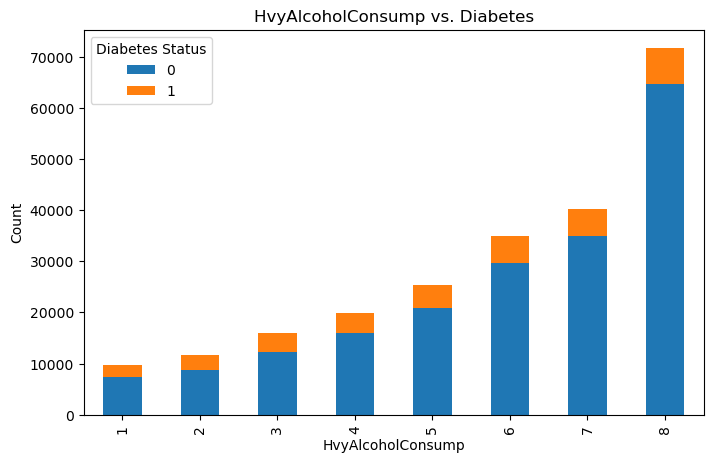

In [31]:
pd.crosstab(df['Income'], df['Diabetes']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('HvyAlcoholConsump vs. Diabetes')
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

## Data Preprocessing

1. First, I built my models using after preprocessing using SMOTE. The models, however, underfitted.
2. Thus, I shifted to use the near miss (undersampling technique), and my models performed better.
3. Since the continuous variables were not normally distributed, I scaled the variables using the standard scaler.

In [32]:
df['Diabetes'].value_counts()

Diabetes
0    194377
1     35097
Name: count, dtype: int64

In [33]:
X=df.drop(["Diabetes"],axis=1)
y=df["Diabetes"]

In [34]:
#smote=SMOTE(sampling_strategy='minority') 
#X,y=smote.fit_resample(X,y)
#y.value_counts()

In [35]:
nm = NearMiss(version = 1 , n_neighbors = 10)

X, y = nm.fit_resample(X,y)
y.value_counts()

Diabetes
0    35097
1    35097
Name: count, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [37]:
X_train_df = X_train

In [38]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

## Modeling

Here, I have built 4 models. All the models I fine tuned the hyperparameters and I achieved an accuracy of above 80% in both the training and the test data.

Also, accross the F1 Score of the models, I achieved an accuracy of above 80% in both the classes.

### Baseline Model

In [39]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Instantiate and train the Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_baseline, y_train_baseline)

LogisticRegression()

In [41]:
y_test_pred_baseline = baseline_model.predict(X_test_baseline)
y_train_pred_baseline = baseline_model.predict(X_train_baseline)

In [42]:
# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")

print("Training accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_train_baseline, y_train_pred_baseline)))
print("Test accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_test_baseline, y_test_pred_baseline)))

print("Classification Report:\n", classification_report(y_test_baseline, y_test_pred_baseline))
print("Confusion Matrix:\n", confusion_matrix(y_test_baseline, y_test_pred_baseline))

Logistic Regression Evaluation:
Training accuracy of Logistic Regression is: 0.8513
Test accuracy of Logistic Regression is: 0.8508
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      7012
           1       0.92      0.77      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039

Confusion Matrix:
 [[6511  501]
 [1593 5434]]


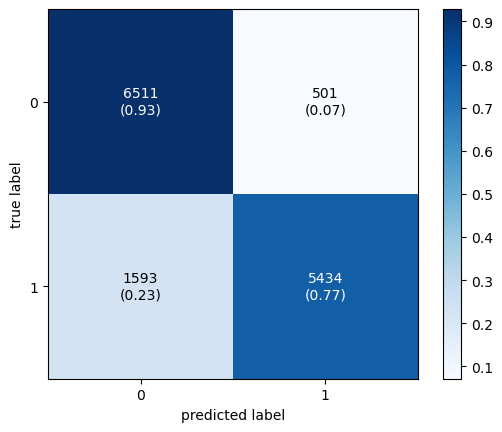

In [43]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test_baseline,y_test_pred_baseline)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

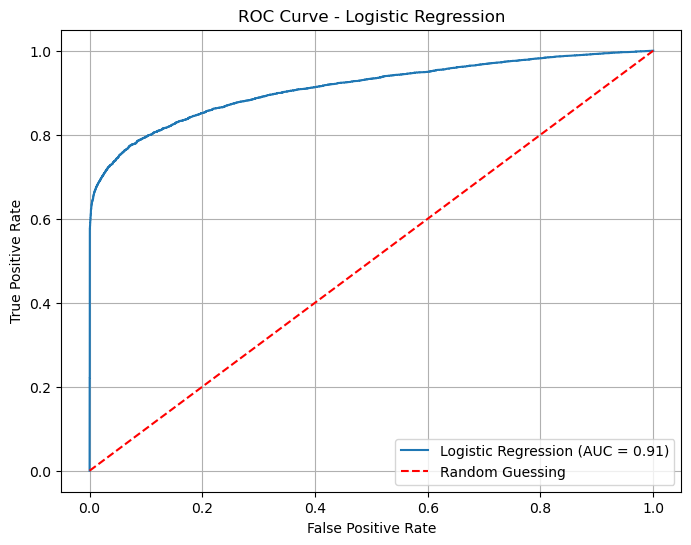

In [44]:
# Plot ROC Curve for Logistic Regression
y_probs_baseline = baseline_model.predict_proba(X_test_baseline)[:, 1]
fpr, tpr, _ = roc_curve(y_test_baseline, y_probs_baseline)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Logistic Regression

In [45]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train , y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [46]:
y_test_pred_lg = log_reg.predict(X_test)
y_train_pred_lg = log_reg.predict(X_train)

In [47]:
# Logistic Regression Evaluation
print("Logistic Regression Evaluation:")

print("Training accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_train, y_train_pred_lg)))
print("Test accuracy of Logistic Regression is: {:.4f}".format(accuracy_score(y_test, y_test_pred_lg)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_lg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lg))

Logistic Regression Evaluation:
Training accuracy of Logistic Regression is: 0.8516
Test accuracy of Logistic Regression is: 0.8500
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      7012
           1       0.92      0.77      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039

Confusion Matrix:
 [[6550  462]
 [1644 5383]]


The model performs very well in both the training and the test data, and the F1 score is high across the two classes.

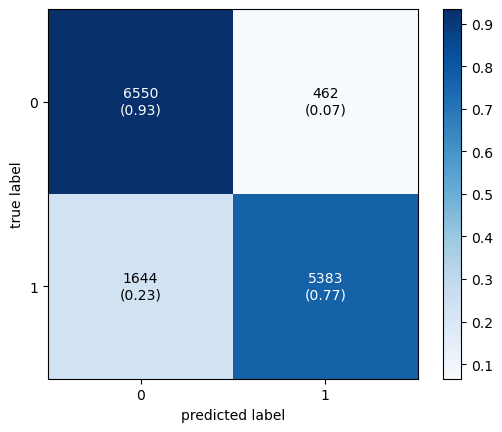

In [48]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_lg)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

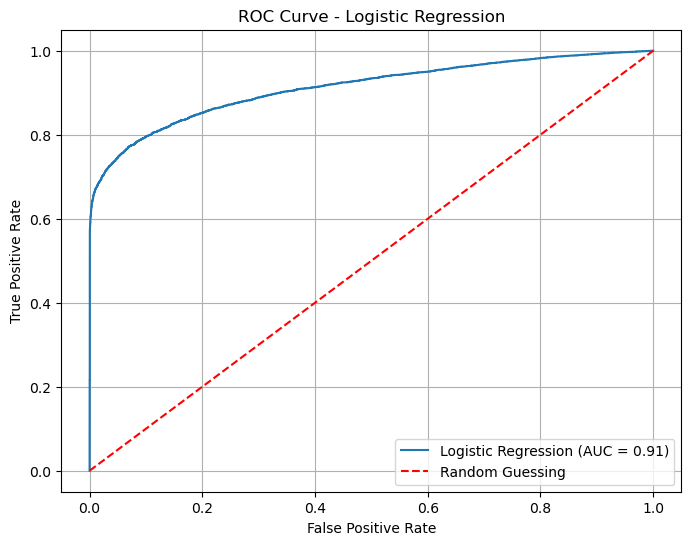

In [49]:
# Plot ROC Curve for Logistic Regression
y_probs = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Decision Trees

In [ ]:
# Define the model (estimator)
model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid (param_grid) to search over
param_grid = {
    'criterion': ['gini', 'entropy'],  # Decision Tree criteria for splitting
    'max_depth': [3, 5, 10, None],      # Max depth of the tree
    'min_samples_split': [2, 5, 10],    # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Min samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider for a split
    'splitter': ['best', 'random']  # Strategy used to split at each node
}

# Create GridSearchCV with reduced parallelism (e.g., n_jobs=4)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, verbose=3, cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

In [50]:
dtc = DecisionTreeClassifier(random_state = 42, max_depth = 9)
dtc.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [51]:
y_test_pred_dt = dtc.predict(X_test)
y_train_pred_dt = dtc.predict(X_train)

In [52]:
# Decision Tree Evaluation
print("Decision Tree Evaluation:")

print("Training accuracy of Decision Tree is: {:.4f}".format(accuracy_score(y_train, y_train_pred_dt)))
print("Test accuracy of Decision Tree is: {:.4f}".format(accuracy_score(y_test, y_test_pred_dt)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt))

Decision Tree Evaluation:
Training accuracy of Decision Tree is: 0.8491
Test accuracy of Decision Tree is: 0.8459
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86      7012
           1       0.94      0.74      0.83      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.84     14039
weighted avg       0.86      0.85      0.84     14039

Confusion Matrix:
 [[6705  307]
 [1856 5171]]


The model performs very well in both the training and the test data, and the F1 score is high across the two classes.

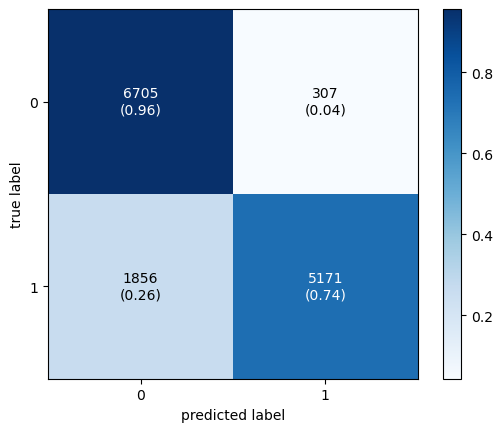

In [53]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_dt)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

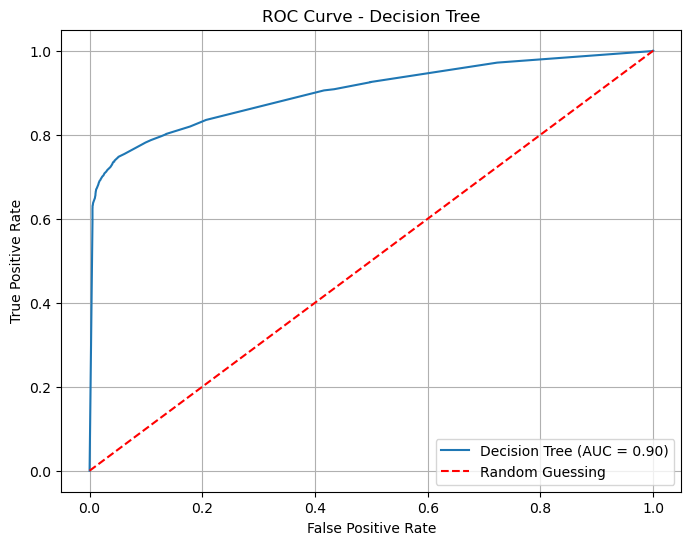

In [54]:
# Plot ROC Curve for Decision Tree Classifier
y_probs = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The area under the curve is large showing good perfomance of the model.

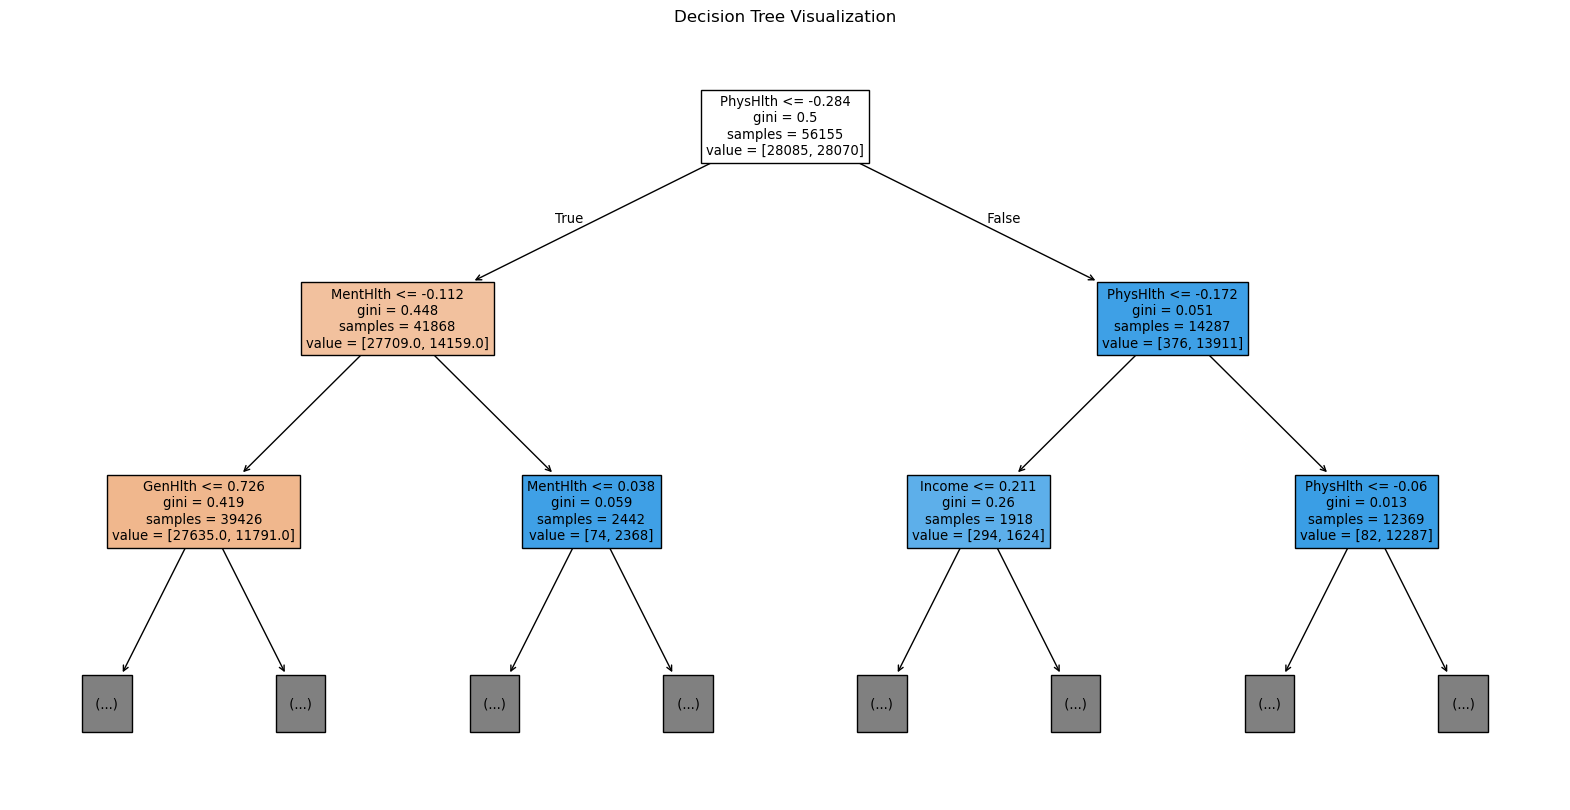

In [55]:
# Assuming `dtc` is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dtc, 
          filled=True, 
          feature_names=X_train_df.columns,  # Replace with the names of your features
          max_depth=2)  # Limit depth for clarity if desired
plt.title("Decision Tree Visualization")
plt.show()

From the decision tree, the most significant variable in determining whether one has diabetes or not is physical health.

### Random Forest

Best params: {'n_estimators': 181, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Best score: 0.865659947289693

In [56]:
# Configure the Random Forest model with adapted parameters
rf_params = {
    'n_estimators': 181,       # Number of trees
    'max_depth': 17,            # Maximum depth of trees
    'min_samples_split': 8,    # Default, adjust if needed
    'min_samples_leaf': 1,     # Default, adjust if needed
    'max_features': 'sqrt',    # Equivalent to colsample_bytree
    'bootstrap': True          # Default subsample behavior in Random Forest
}

# Instantiate the Random Forest model
random_forest = RandomForestClassifier(**rf_params, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, min_samples_split=8, n_estimators=181,
                       random_state=42)

In [57]:
y_test_pred_rf = random_forest.predict(X_test)
y_train_pred_rf = random_forest.predict(X_train)

In [58]:
print("Random Forest Evaluation:")

print("Training accuracy of Random Forest is: {:.4f}".format(accuracy_score(y_train, y_train_pred_rf)))
print("Test accuracy of Random Forest is: {:.4f}".format(accuracy_score(y_test, y_test_pred_rf)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

Random Forest Evaluation:
Training accuracy of Random Forest is: 0.8886
Test accuracy of Random Forest is: 0.8657
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      7012
           1       0.95      0.77      0.85      7027

    accuracy                           0.87     14039
   macro avg       0.88      0.87      0.86     14039
weighted avg       0.88      0.87      0.86     14039

Confusion Matrix:
 [[6712  300]
 [1586 5441]]


The model performs very well in both the training and the test data, and the F1 score is high across the two classes.

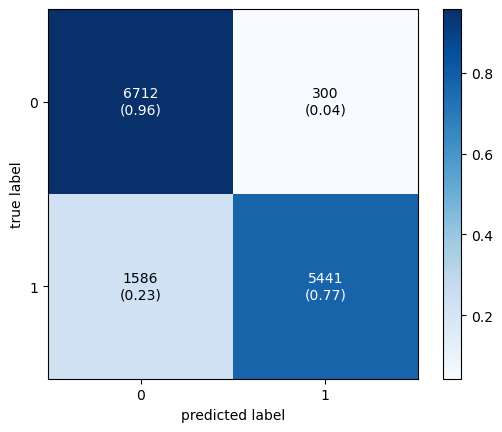

In [59]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_rf)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

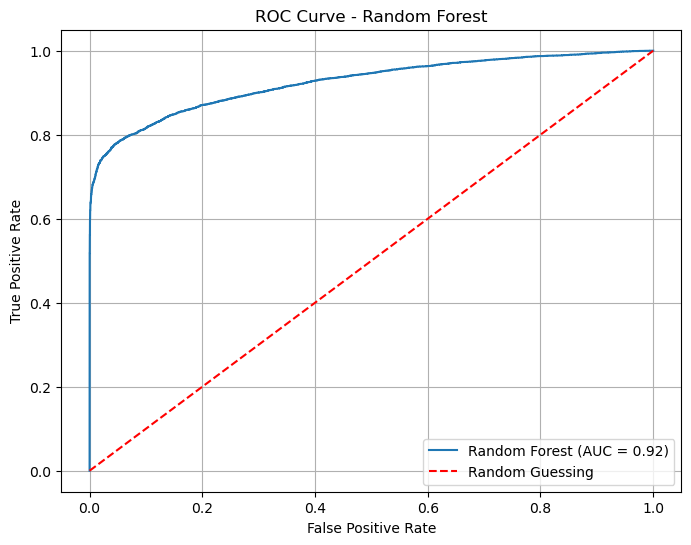

In [60]:
# Plot ROC Curve for Random Forest Classifier
y_probs = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The area under the curve is large showing good perfomance of the model.

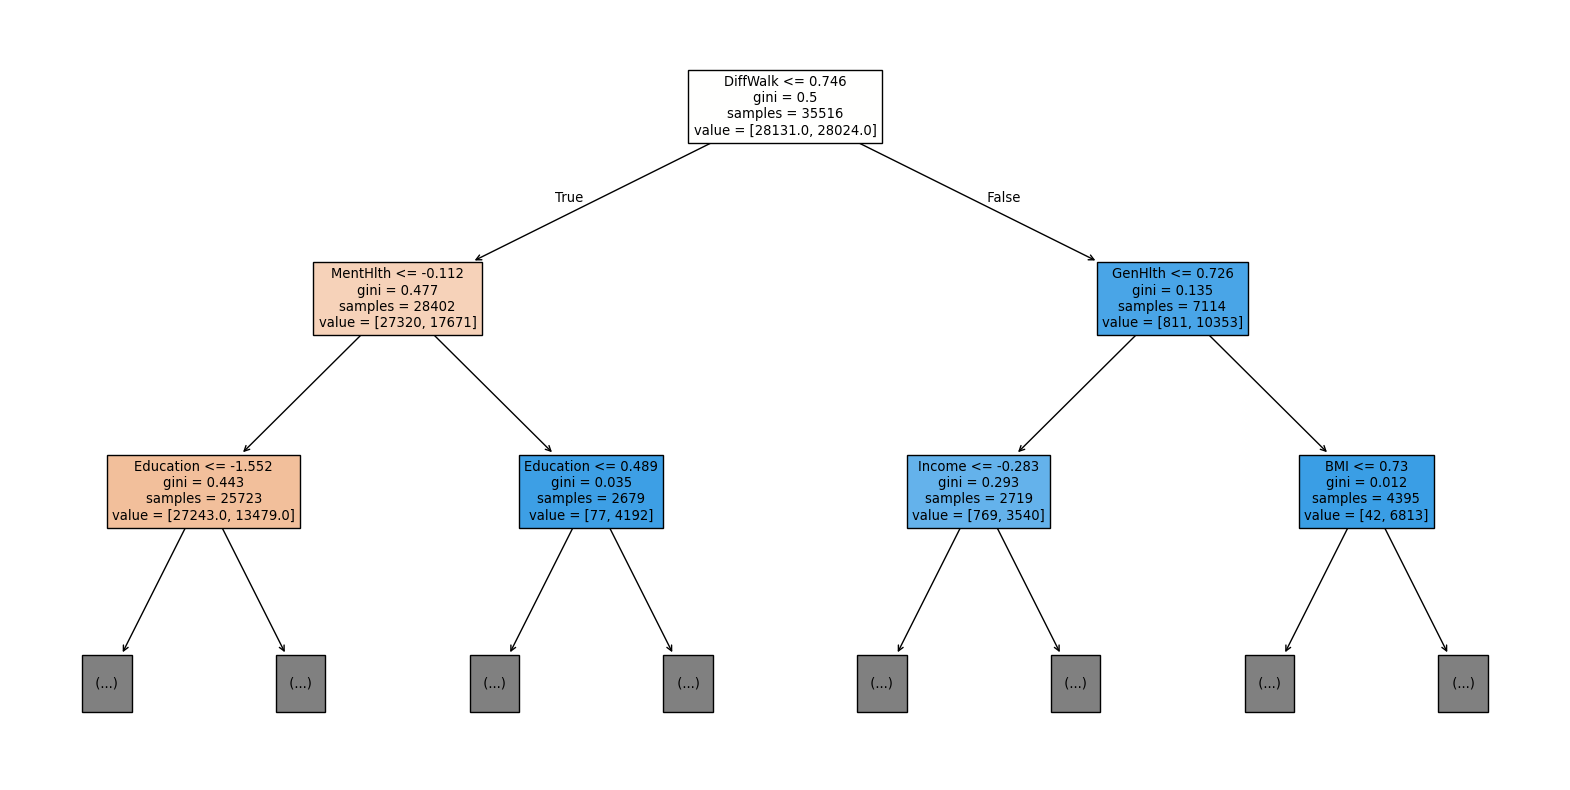

In [61]:
# Visualizing the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns, max_depth=2)
plt.show()

From the random forest the most significant variable in determining whether one has diabetes or not is difficulty waking/climbing variable.

### XGBoost

Best params: {'learning_rate': 0.08167918076871283, 'max_depth': 3, 'subsample': 0.9973699502598078, 'colsample_bytree': 0.8250143171561988, 'n_estimators': 54, 'gamma': 0.10154738011480782, 'alpha': 9.82855274339385, 'lambda': 6.0539485808747}
Best score: 0.8221383289408077

In [62]:
best_params = {
    'learning_rate': 0.08167918076871283,
    'max_depth': 3,
    'subsample': 0.9973699502598078,
    'colsample_bytree': 0.8250143171561988,
    'n_estimators': 54,
    'gamma': 0.10154738011480782,
    'alpha': 9.82855274339385,
    'lambda': 6.0539485808747
    
}
# instantiate the classifier 
xg = XGBClassifier(**best_params, random_state=42)



# fit the classifier to the training data
xg.fit(X_train, y_train)

XGBClassifier(alpha=9.82855274339385, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8250143171561988, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.10154738011480782,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=6.0539485808747,
              learning_rate=0.08167918076871283, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=54, n_jobs=None, ...)

In [63]:
y_test_pred_xg = xg.predict(X_test)
y_train_pred_xg = xg.predict(X_train)

In [64]:
print("xgBoost Evaluation:")

print("Training accuracy of xgBoost is: {:.4f}".format(accuracy_score(y_train, y_train_pred_xg)))
print("Test accuracy of xgBoost is: {:.4f}".format(accuracy_score(y_test, y_test_pred_xg)))

print("Classification Report:\n", classification_report(y_test, y_test_pred_xg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xg))

xgBoost Evaluation:
Training accuracy of xgBoost is: 0.8520
Test accuracy of xgBoost is: 0.8176
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      7012
           1       0.86      0.76      0.81      7027

    accuracy                           0.82     14039
   macro avg       0.82      0.82      0.82     14039
weighted avg       0.82      0.82      0.82     14039

Confusion Matrix:
 [[6104  908]
 [1653 5374]]


The model performs very well in both the training and the test data, and the F1 score is high across the two classes.

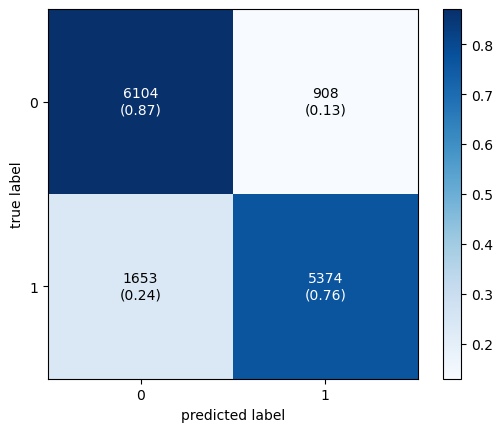

In [65]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_test_pred_xg)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True, show_normed=True, colorbar=True)
plt.show()

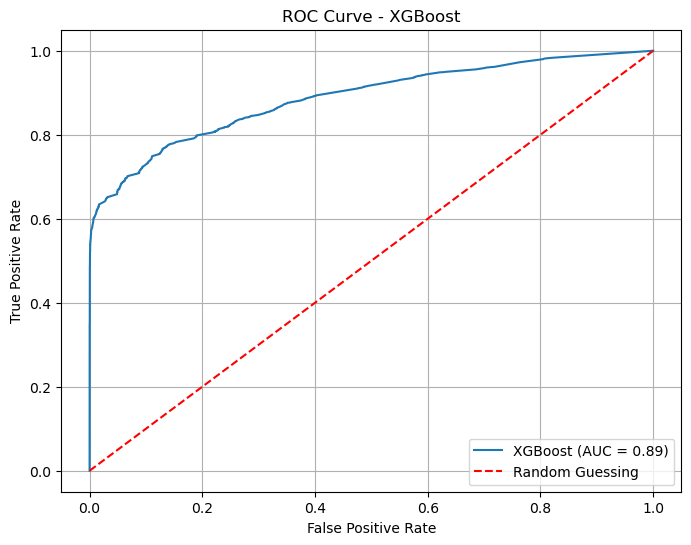

In [66]:
# Plot ROC Curve for XGBoost Classifier
y_probs = xg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Random Guessing')
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

The area under the curve is large showing good perfomance of the model.

## Model Comparisons

Here, I did model comparison and concluded that the random forest had the highest accuracy. Also had the highest area under the curve 0.92
1. Training accuracy: 88.86%
2. Test accuracy: 86.57%

Also, I checked for the area ander the curves and all the models had an area of over 0.88, thus my models achieved optimal performance.

In [67]:
# Accuracies for each model
training_accuracies = [
    accuracy_score(y_train, y_train_pred_lg),  
    accuracy_score(y_train, y_train_pred_dt),  
    accuracy_score(y_train, y_train_pred_rf),  
    accuracy_score(y_train, y_train_pred_xg),  
]

test_accuracies = [
    accuracy_score(y_test, y_test_pred_lg),  
    accuracy_score(y_test, y_test_pred_dt),  
    accuracy_score(y_test, y_test_pred_rf), 
    accuracy_score(y_test, y_test_pred_xg),
]

models = pd.DataFrame({
    'Model': ['Logistic', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Training Accuracy': training_accuracies,
    'Test Accuracy': test_accuracies
})

models = models.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

models

Model  Training Accuracy  Test Accuracy
0  Random Forest           0.888594       0.865660
1       Logistic           0.851607       0.849989
2  Decision Tree           0.849061       0.845929
3        XGBoost           0.851999       0.817580

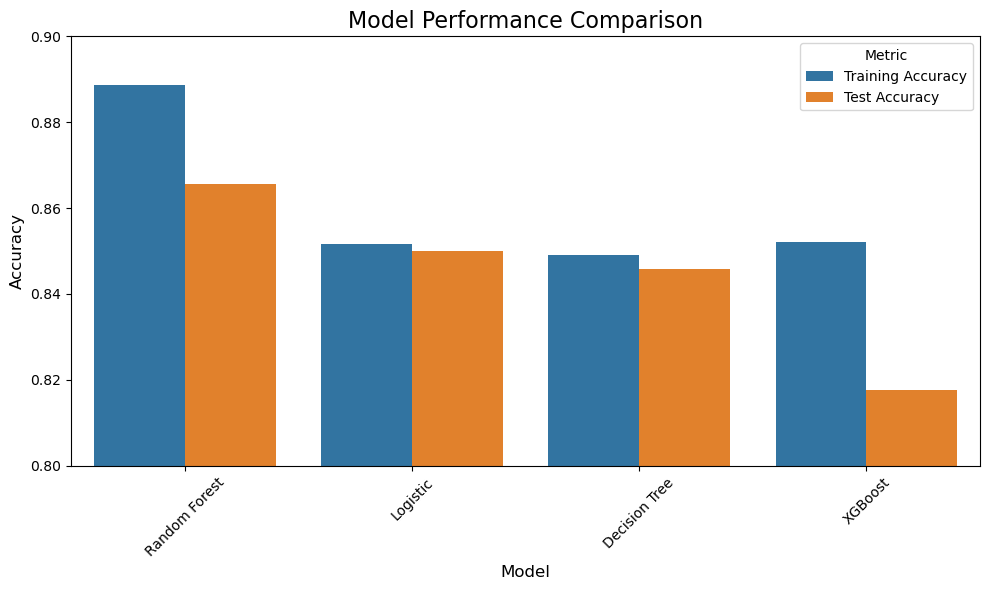

In [68]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Melt the DataFrame to long format for easier plotting
models_melted = models.melt(id_vars='Model', 
                            value_vars=['Training Accuracy', 'Test Accuracy'], 
                            var_name='Metric', 
                            value_name='Accuracy')

# Plot the bar chart
sns.barplot(data=models_melted, x='Model', y='Accuracy', hue='Metric')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 0.9)  
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

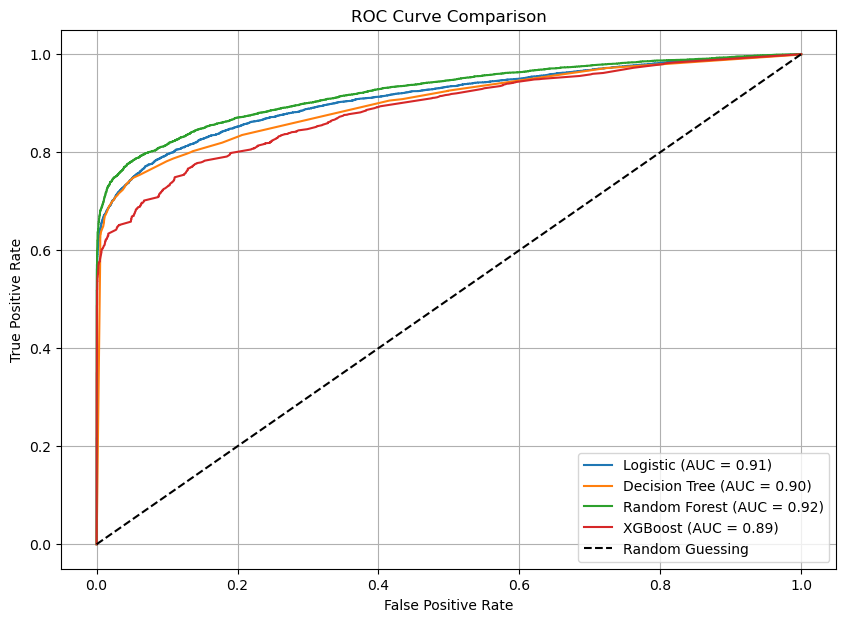

In [69]:
# Function to plot ROC curve
def plot_roc_curve(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 7))
    for model, name in zip(models, model_names):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot ROC curves for all models
models = [log_reg, dtc, random_forest, xg]
model_names = ['Logistic', 'Decision Tree', 'Random Forest', 'XGBoost']
plot_roc_curve(models, X_test, y_test, model_names)

Random Forest is the best performing model since it has the highest area under the curve of 0.92